In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
#from scipy.integrate import solve_ivp

In [58]:
G=1
m_planet=1
m_Mond=0.02
m_RS=1e-10
R_Planet=1

In [59]:
def F(rvec,masse):
    return -G*m_planet*masse/np.linalg.norm(rvec)**3.0*rvec

In [60]:
def f(t,yvec,masse):
    rvec1=yvec[0:3]
    rvec2=yvec[3:6]
    vvec1=yvec[6:9]
    vvec2=yvec[9:12]
    rvec=rvec1-rvec2
    dvvec1_dt=F(rvec,masse)/m_planet
    dvvec2_dt=F(rvec,masse)/masse
    results=np.concatenate((vvec1,vvec2,dvvec1_dt,dvvec2_dt))
    return results

In [62]:
def RK4_method(mass,t_initial,t_final,r1_initial,v1_initial,r2_initial,v2_initial,dt):
    N=int((t_final-t_initial)/dt)
    r1=np.zeros((N+1,3))
    v1=np.zeros((N+1,3))
    r2=np.zeros((N+1,3))
    v2=np.zeros((N+1,3))
    t=np.zeros(N+1)
    r1[0]=r1_initial
    v1[0]=v1_initial
    r2[0]=r2_initial
    v2[0]=v2_initial
    t[0]=t_initial
    h=dt
    yn=np.concatenate((r1[0],r2[0],v1[0],v2[0]))
    for n in range(0,N):
        k1=h*f(t[n],yn,mass)
        k2=h*f(t[n]+h/2.0,yn+k1/2.0,mass)
        k3=h*f(t[n]+h/2.0,yn+k2/2.0,mass)
        k4=h*f(t[n]+h,yn+k3,mass)
        k=k1+2.0*k2+2.0*k3+k4
        yn=yn+k/6.0
        r1[n+1]=yn[0:3]
        r2[n+1]=yn[3:6]
        v1[n+1]=yn[6:9]
        v2[n+1]=yn[9:12]
        t[n+1]=t[n]+dt
    return t,r1,r2,v1,v2,N

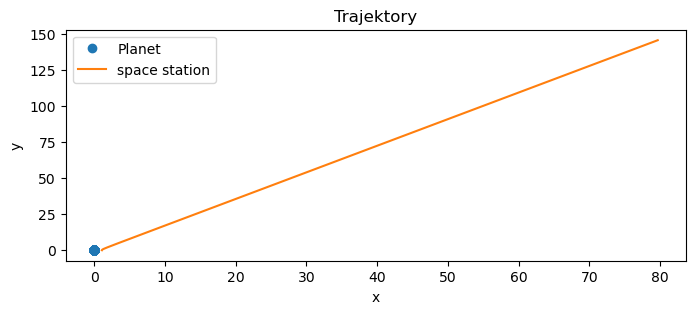

In [63]:
r_planet=np.array([0,0,0])
v_planet=np.array([0,0,0])
r_RS=np.array([1.1,0,0])
v_RS=np.array([0,1.0,0.0])
t_in=0.0
t_fin=100.0
dt=0.1

tt,r1,r2,v1,v2,N=RK4_method(m_RS,t_in,t_fin,r_planet,v_planet,r_RS,v_RS,dt)  #m_RS to m_Mond for the Mond 
fig, ax1 = plt.subplots(nrows=1, ncols=1,figsize=(4*2, 3*1))

ax1.plot(r1[:,0], r1[:,1], 'o', label='Planet')  # It is at fixed poit
ax1.plot(r2[:,0], r2[:,1], label='space station')  # it should go around

ax1.set_title('Trajektory')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
plt.legend()
plt.show()
